# 2019 CUPT Problem9 Hurricane Ball

Two steel balls that are joined together can be spun at incredibly high frequency by first spinning them by hand and then blowing on them through a tube, e.g. a drinking straw. Explain and investigate this phenomenon.

通过起始时用手旋转，并使用一根管子（如吸管）朝其吹气，连在一起的两个钢球能以极高的频率旋转。解释并探究这一现象。

In [2]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib as mp

## 对飓风球运动全过程的分析

分析实验拍摄的视频中可知：飓风球被手拨动后开始公转，但一开始并没有自转角速度；在公转的过程中，飓风球两球心连线的与水平方向的夹角逐渐增大（也就是飓风球逐渐立起，在立起的过程中还存在章动）并且获得自转角速度，公转角速度减小，自转角速度增大；当这样的过程达到一定程度时，飓风球与桌面之间不再有相对滑动，而转变为纯滚动，此时飓风球达到一个相对稳定的旋转状态；若对飓风球吹气则可使其旋转进一步加速，达到最高超过$30$Hz的公转频率；当停止吹气加速后，飓风球的旋转逐渐减慢（公转角速度与自转角速度同时减小），两球心连线与桌面之间的夹角逐渐减小，这一减速的过程往往能够持续分钟级别的时间，这一阶段中飓风球与桌面之间仍为纯滚动；当飓风球完全倒下（即两球心连线水平，两个球同时与桌面接触），滚动摩擦变为滑动摩擦，使飓风球剩余的动能迅速耗散；最终飓风球静止。

<br/>

在飓风球两球均接触桌面旋转到一球离开桌面的过程中，飓风球从一个对称的状态变为一个非对称的状态，为何使其中一球抬起，而非另一球？这是因为实施实验的条件并非都是完全对称的，可能是两个小球的质量有细微的差异，又或是两个小球与桌面的摩擦系数有细微的差异，再或是桌面上存在凸起或凹陷，使飓风球运动过程中其中一小球在某一瞬间不受桌面的支持力......这些都是可能造成不对称运动的原因。

### 飓风球启动到无滑动稳定转动阶段

#### 参数设定

设每个小球质量为$m$，半径为$R$，重力加速度记为$g$。

在飓风球启动到无滑动稳定转动的过程中，飓风球中一球始终与桌面接触，故系统自由度为$5$，因此设$5$个自由度：
* 飓风球质心在水平桌面上投影点的$x$,$y$坐标
* 飓风球的三个欧拉角：公转角$\varphi$，自转角$\psi$和两球心连线与竖直方向的夹角$\theta$

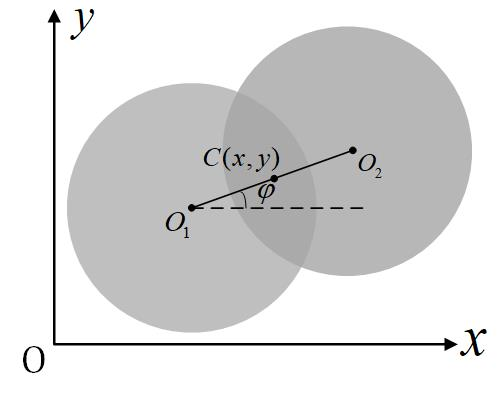
<center>俯视图</center>

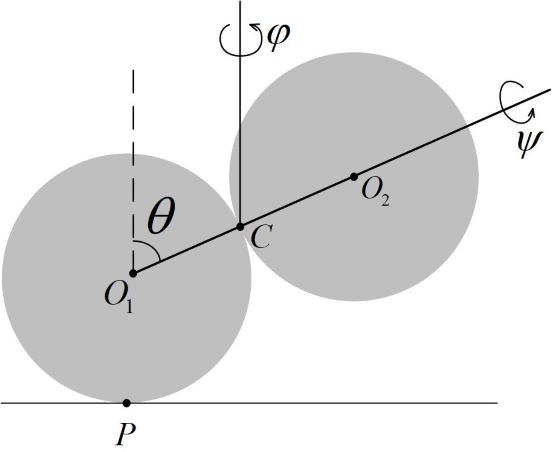
<center>侧视图</center>

In [2]:
m = sp.Symbol('m')
R = sp.Symbol('R')
g = sp.Symbol('g')
x = sp.Symbol('x')
y = sp.Symbol('y')
phi = sp.Symbol('phi')
theta = sp.Symbol('theta')
psi = sp.Symbol('psi')
x1 = sp.Symbol('x1')
y1 = sp.Symbol('y1')
phi1 = sp.Symbol('phi1')
theta1 = sp.Symbol('theta1')
psi1 = sp.Symbol('psi1')
x2 = sp.Symbol('x2')
y2 = sp.Symbol('y2')
phi2 = sp.Symbol('phi2')
theta2 = sp.Symbol('theta2')
psi2 = sp.Symbol('psi2')

#### 受力分析

为简化问题我们忽略空气阻力，此时飓风球受到三个力的作用：

* 重力（沿竖直方向）
* 桌面对飓风球的支持力（沿竖直方向）
* 飓风球与桌面接触点（下简称接触点）相对于桌面运动从而受到的摩擦力（沿水平桌面）
---
##### 静摩擦力的表示
飓风球受到的摩擦力为**静摩擦**，其**大小**为飓风球与桌面静摩擦系数$\mu$与桌面对飓风球的支持力$\vec{N}$大小的乘积
$$f=\mu N.$$

In [3]:
mu = sp.Symbol('mu')
N = sp.Symbol('N')
f = mu * N

而**摩擦力的方向**与接触点相对于桌面运动的方向相反，随着飓风球的转动而不断变化。要求飓风球的摩擦力方向，需知接触点相对于桌面的运动速度$\vec{v}$。这一速度可视为四个速度的矢量叠加，分别是：

* 飓风球质心的速度
$$\vec{v}_c=\dot{x}\vec{i}+\dot{y}\vec{j}$$
其中$\vec{i}$和$\vec{j}$分别是沿$x$轴和$y$轴方向的单位矢量

* 角速度$\varphi$分量引起的接触点相对于质心的速度（沿桌面的分量）
$$\vec{v}_{\varphi}=R\dot{\varphi}\sin\theta(\sin\varphi\vec{i}-\cos\varphi\vec{j})$$
* 角速度$\vec{\psi}$分量引起的接触点相对于质心的速度$\vec{v}_{\psi}$（沿桌面的分量）
$$\vec{v}_{\psi}=R\dot{\psi}\sin\theta(-\sin\varphi\vec{i}+\cos\varphi\vec{j})$$
* 角速度$\theta$分量引起的接触点相对于质心的速度$\vec{v}_{\theta}$沿桌面的分量
$$\vec{v}_{\theta}=2R\dot{\theta}\cos^2\frac{\theta}{2}(-\cos\varphi\vec{i}-\sin\varphi\vec{j})$$
从而
$$\vec{v}=\vec{v}_v+\vec{v}_{\varphi}+\vec{v}_{\psi}+\vec{v}_{\theta}\\
=(x_1+R\dot{\varphi}\sin\theta\sin\varphi-R\dot{\psi}\sin\theta\sin\varphi-2R\dot{\theta}\cos^2\frac{\theta}{2}\cos\varphi)\vec{i}+(\dot{y}-R\dot{\varphi}\sin\theta\cos\varphi+R\dot{\psi}\sin\theta\cos\phi-2R\dot{\theta}\cos^2\frac{\theta}{2}\sin\varphi)\vec{j}\triangleq v_x\vec{i}+v_j\vec{j}$$

In [4]:
vx = x1 + R * phi1 * sp.sin(theta) * sp.sin(phi) - R * psi1 * sp.sin(theta) * sp.sin(phi) - 2 * R * theta1 * sp.cos(theta / 2)**2 * sp.cos(phi)
print('v_x=')
vx

v_x=


R*phi1*sin(phi)*sin(theta) - R*psi1*sin(phi)*sin(theta) - 2*R*theta1*cos(phi)*cos(theta/2)**2 + x1

In [5]:
vy = y1 - R * phi1 * sp.sin(theta) * sp.cos(psi) - R * psi1 * sp.sin(theta) * sp.cos(phi) - 2 * R * theta1 * sp.cos(theta / 2)**2 * sp.sin(phi)
print('v_y=')
vy

v_y=


-R*phi1*sin(theta)*cos(psi) - R*psi1*sin(theta)*cos(phi) - 2*R*theta1*sin(phi)*cos(theta/2)**2 + y1

In [6]:
v = sp.sqrt(vx**2 + vy**2)

从而飓风球受到的摩擦力为
$$\vec{f}=-f(\frac{v_x}{v}\vec{i}+\frac{v_y}{v}\vec{j})\triangleq f_x\vec{i}+f_y\vec{j}$$

In [7]:
fx = - f * vx / v
fy = - f * vy / v

#### 飓风球系统动力学方程

于是，我们可以在实验室坐标系的三个正交方向上列出关于系统质心的动力学方程：

* 沿$x$轴方向受到摩擦力的$x$分量
$$2m\ddot{x}=f_x$$
* 沿$y$轴方向受到摩擦力的$y$分量
$$2m\ddot{y}=f_y$$
* 沿$z$轴方向受到重力和桌面对飓风球的支持力
$$2m\ddot{z}=N-mg$$
其中飓风球质心的$z$坐标可表示为
$$z=R+R\cos\theta$$
其二阶导为
$$\ddot{z}=R(-\ddot{\theta}\sin\theta-\dot{\theta}^2\cos\theta)$$

In [8]:
equ1 = 2 * m * x2 - fx
equ2 = 2 * m * y2 - fy
equ3 = 2 * m * R * (-theta2 * sp.sin(theta) - theta1**2 * sp.cos(theta))

#### 飓风球系统的欧拉动力学方程

此外，还可列出系统的三个欧拉动力学方程：
$$I_1\dot{\omega}_1-(I_2-I_3)\omega_2\omega_3=M_1\\
I_2\dot{\omega}_2-(I_3-I_1)\omega_3\omega_1=M_2\\
I_3\dot{\omega}_3-(I_1-I_2)\omega_1\omega_2=M_3$$
其中3轴沿两球心连线斜向上，另外的1轴和2轴与之形成一个右手正交坐标系，3轴随飓风球公转（$\varphi$）的同时，1轴和2轴绕着3轴自转（$\psi$）。

飓风球绕着这三个轴的转动惯量分别为
$$I_1=I_2=\frac{14}{5}mR^2\\
I_3=\frac{4}{5}mR^2$$

In [9]:
I1 = 14 / 5 * m * R**2
I2 = 14 / 5 * m * R**2
I3 = 4 / 5 * m * R**2

三个欧拉角分别为
$$\omega_1=\dot{\varphi}\sin\theta\sin\psi+\dot{\theta}\cos\psi\\
\omega_2=\dot{\varphi}\sin\theta\cos\psi-\dot{\theta}\sin\psi\\
\omega_3=\dot{\varphi}\cos\theta+\dot{\psi}$$

In [10]:
omega1 = phi1 * sp.sin(theta) * sp.sin(psi) + theta1 * sp.cos(psi)
omega2 = phi1 * sp.sin(theta) * sp.cos(psi) - theta1 * sp.sin(psi)
omega3 = phi1 * sp.cos(theta) + psi1

这三个欧拉角的一阶导分别为
$$\dot{\omega}_1=\ddot{\varphi}\sin\theta\sin\psi+\dot{\varphi}\dot{\theta}\cos\theta\sin\psi+\dot{\varphi}\dot{\psi}\sin\theta\cos\psi+\ddot{\theta}\cos\psi-\dot{\theta}\dot{\psi}\sin\psi\\
\dot{\omega}_2=\ddot{\varphi}\sin\theta\cos\psi+\dot{\varphi}\dot{\theta}\cos\theta\cos\psi-\dot{\varphi}\dot{\psi}\sin\theta\sin\psi-\ddot{\theta}\sin\psi-\dot{\theta}\dot{\psi}\cos\psi\\
\dot{\omega}_3=\ddot{\varphi}\cos\theta-\dot{\varphi}\dot{\theta}\sin\theta+\ddot{\psi}$$

In [11]:
omega11 = phi2 * sp.sin(theta) * sp.sin(psi) + phi1 * theta1 * sp.cos(theta) * sp.sin(psi) + phi1 * psi1 * sp.sin(theta) * sp.sin(psi) + theta2 * sp.cos(psi) - theta1 * psi1 * sp.sin(psi)
omega21 = phi2 * sp.sin(theta) * sp.cos(psi) + phi1 * theta1 * sp.cos(theta) * sp.cos(psi) - phi1 * psi1 * sp.sin(theta) * sp.cos(psi) - theta2 * sp.sin(psi) - theta1 * psi1 * sp.cos(psi)
omega31 = phi2 * sp.cos(theta) - phi1 * theta1 * sp.sin(theta) + psi2

设1'轴垂直于3轴且与桌面平行，2'轴垂直于3轴和2'轴且斜向上，那么沿着1'轴，2'轴和3轴的力矩分别为
$$M_1'=2R(-f_x\cos\varphi-f_y\sin\varphi)\cos^2\frac{\theta}{2}+NR\sin\theta\\
M_2'=2R(f_x\sin\varphi-f_y\cos\varphi)\cos^2\frac{\theta}{2}\\
M_3=R(-f_x\sin\varphi+f_y\cos\varphi)\sin\theta$$
1'轴与1轴，2'轴和2轴之间的夹角均为$\psi$，故沿着1轴和2轴的力矩分别为
$$M_1=M_1'\cos\psi+M_2'\sin\psi\\
M_2=-M_1'\sin\psi+M_2'\cos\psi$$

In [12]:
M10 = 2 * R * (-fx * sp.cos(phi) - fy * sp.sin(phi)) * sp.cos(theta / 2)**2 + N * R * sp.sin(theta)
M20 = 2 * R * (fx * sp.sin(phi) - fy * sp.cos(phi)) * sp.cos(theta / 2)**2
M3 = R * (-fx * sp.sin(phi) + fy * sp.cos(phi)) * sp.sin(theta)
M1 = M10 * sp.cos(psi) + M20 * sp.sin(psi)
M2 = -M10 * sp.sin(psi) + M20 * sp.cos(psi)

将以上所得转动惯量、角速度、角速度一阶导和力矩代入三个欧拉动力学方程

In [13]:
equ4 = I1 * omega11 - (I2 - I3) * omega2 * omega3 - M1
equ5 = I2 * omega21 - (I3 - I1) * omega3 * omega1 - M2
equ6 = I3 * omega31 - (I1 - I2) * omega1 * omega2 - M3

将以上六个方程化为适合求解的形式

In [14]:
# sp.solvers.solve([equ1,equ2,equ3,equ4,equ5,equ6],x2,y2,phi2,theta2,psi2,N)

似乎比较难算，稍微简化一下

In [15]:
m = sp.Symbol('m')
R = sp.Symbol('R')
g = sp.Symbol('g')
x = sp.Symbol('x')
y = sp.Symbol('y')
phi = sp.Symbol('phi')
theta = sp.Symbol('theta')
psi = sp.Symbol('psi')
x1 = sp.Symbol('x1')
y1 = sp.Symbol('y1')
phi1 = sp.Symbol('phi1')
theta1 = sp.Symbol('theta1')
psi1 = sp.Symbol('psi1')
x2 = sp.Symbol('x2')
y2 = sp.Symbol('y2')
phi2 = sp.Symbol('phi2')
theta2 = sp.Symbol('theta2')
psi2 = sp.Symbol('psi2')
mu = sp.Symbol('mu')
N = sp.Symbol('N')
xcomponant = sp.Symbol('xcomponant')
ycomponant = sp.Symbol('ycomponant')
fx = mu * N * xcomponant
fy = mu * N * ycomponant
I1 = sp.Symbol('I1')
I2 = sp.Symbol('I2')
I3 = sp.Symbol('I3')
omega1 = sp.Symbol('omega1')
omega2 = sp.Symbol('omega2')
omega3 = sp.Symbol('omega3')
omega11 = phi2 * sp.sin(theta) * sp.sin(psi) + phi1 * theta1 * sp.cos(theta) * sp.sin(psi) + phi1 * psi1 * sp.sin(theta) * sp.sin(psi) + theta2 * sp.cos(psi) - theta1 * psi1 * sp.sin(psi)
omega21 = phi2 * sp.sin(theta) * sp.cos(psi) + phi1 * theta1 * sp.cos(theta) * sp.cos(psi) - phi1 * psi1 * sp.sin(theta) * sp.cos(psi) - theta2 * sp.sin(psi) - theta1 * psi1 * sp.cos(psi)
omega31 = phi2 * sp.cos(theta) - phi1 * theta1 * sp.sin(theta) + psi2
M10 = 2 * R * (-fx * sp.cos(phi) - fy * sp.sin(phi)) * sp.cos(theta / 2)**2 + N * R * sp.sin(theta)
M20 = 2 * R * (fx * sp.sin(phi) - fy * sp.cos(phi)) * sp.cos(theta / 2)**2
M3 = R * (-fx * sp.sin(phi) + fy * sp.cos(phi)) * sp.sin(theta)
M1 = M10 * sp.cos(psi) + M20 * sp.sin(psi)
M2 = -M10 * sp.sin(psi) + M20 * sp.cos(psi)
equ1 = 2 * m * x2 - fx
equ2 = 2 * m * y2 - fy
equ3 = 2 * m * R * (-theta2 * sp.sin(theta) - theta1**2 * sp.cos(theta)) - N + 2 * m * g
equ4 = I1 * omega11 - (I2 - I3) * omega2 * omega3 - M1
equ5 = I2 * omega21 - (I3 - I1) * omega3 * omega1 - M2
equ6 = I3 * omega31 - (I1 - I2) * omega1 * omega2 - M3
sol = sp.solvers.solve([equ1,equ2,equ3,equ4,equ5,equ6],x2,y2,phi2,theta2,psi2,N)

#### 定量模拟
以半径$R=20mm=2\times10^{-2}m$（公差$\pm0.002mm$），质量$m=32.93g=3.293\times10^{-2}kg$（公差$\pm0.01g$）的两个小钢球组成的飓风球在光滑不锈钢板上的运动为例（实验地点为上海，重力加速度$g=9.7964m/s^2$）。

要模拟出出其运动情况，还需要测量小球与桌面之间的滑动摩擦系数。

我们通过分析小球在已知倾角斜面上下滑的视频，得到其加速度，进而推测出小球与桌面之间的滑动摩擦系数。


<center>测量小球与桌面之间的滑动摩擦系数实验图，为了防止小球在下滑的过程中发生滚动，我们用热熔胶将三个小球粘为一个整体，从斜面上滑下</center>

### 飓风球启动至无滑动旋转阶段（考虑空气阻力）

飓风球在旋转过程中受到的空气阻力很复杂。为了简化问题，我们通过实验得到单个小球受空气阻力与小球相对空气运动速度之间的关系，认为飓风球运动中受到的空气阻力为一个小球受到的空气的两倍

首先我们通过

### 飓风球吹气加速阶段
#### 小球与桌面材料之间滚动摩擦系数的获得

与之前获得小球与不锈钢板之间滑动摩擦系数的方法类似，我们将小球从不锈钢板斜面顶端静止释放，通过逐帧分析小球在斜面上滚动的视频，得到小球在斜面上滚下时的加速度，从而

---

我们

In [5]:
data = pd.read_excel('Experiment/小球与不锈钢平面之间滚动摩擦系数的测量.xlsx')
data

,小球在水平桌面上滚动摩擦系数的测量实验数据记录表,Unnamed: 1
0,小球材质,不锈钢
1,小球直径/mm,20
2,小球质量/g,32.93
3,斜面倾角/°,5
4,时间t/s,小球滚下的距离x/m
5,0.0443444,-0.00161633
6,0.0776667,-0.00323439
7,0.110989,-0.00485245
8,0.144433,-0.00663231
9,0.177778,-0.0088976


In [9]:
t = data.loc[5:59,['小球在水平桌面上滚动摩擦系数的测量实验数据记录表']]
t.index

TypeError: 'RangeIndex' object is not callable